In [1]:
# Import necessary libraries
library(tidyverse)  # For data manipulation and visualization
library(lubridate)  # For date handling
library(readr)      # For reading data
library(ggplot2)    # For data visualization
library(dplyr)      # For data manipulation
library(stringr)    # For string operations
library(janitor)    # For cleaning data

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘janitor’




The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




### Data Preprocessing and Cleaning Data

After importing the libraries or the dependencies, first, we focus on preparing the data for in-depth analysis by performing essential preprocessing and cleaning tasks. This stage is crucial as it ensures that the dataset is accurate, consistent, and ready for analysis, ultimately leading to more reliable and meaningful insights.

#### Importing the dataset retail_sales_dataset.csv

In [2]:
data = read_csv("/kaggle/input/retail-sales-dataset/retail_sales_dataset.csv")

Rows: 1000 Columns: 9


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): Customer ID, Gender, Product Category
dbl  (5): Transaction ID, Age, Quantity, Price per Unit, Total Amount
date (1): Date



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#### View the structure and summary of dataset

In [3]:
str(data)
summary(data)

spc_tbl_ [1,000 × 9] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Transaction ID  : num [1:1000] 1 2 3 4 5 6 7 8 9 10 ...
 $ Date            : Date[1:1000], format: "2023-11-24" "2023-02-27" ...
 $ Customer ID     : chr [1:1000] "CUST001" "CUST002" "CUST003" "CUST004" ...
 $ Gender          : chr [1:1000] "Male" "Female" "Male" "Male" ...
 $ Age             : num [1:1000] 34 26 50 37 30 45 46 30 63 52 ...
 $ Product Category: chr [1:1000] "Beauty" "Clothing" "Electronics" "Clothing" ...
 $ Quantity        : num [1:1000] 3 2 1 1 2 1 2 4 2 4 ...
 $ Price per Unit  : num [1:1000] 50 500 30 500 50 30 25 25 300 50 ...
 $ Total Amount    : num [1:1000] 150 1000 30 500 100 30 50 100 600 200 ...
 - attr(*, "spec")=
  .. cols(
  ..   `Transaction ID` = col_double(),
  ..   Date = col_date(format = ""),
  ..   `Customer ID` = col_character(),
  ..   Gender = col_character(),
  ..   Age = col_double(),
  ..   `Product Category` = col_character(),
  ..   Quantity = col_double(),
  ..   `Price per Un

 Transaction ID        Date            Customer ID           Gender         
 Min.   :   1.0   Min.   :2023-01-01   Length:1000        Length:1000       
 1st Qu.: 250.8   1st Qu.:2023-04-08   Class :character   Class :character  
 Median : 500.5   Median :2023-06-29   Mode  :character   Mode  :character  
 Mean   : 500.5   Mean   :2023-07-03                                        
 3rd Qu.: 750.2   3rd Qu.:2023-10-04                                        
 Max.   :1000.0   Max.   :2024-01-01                                        
      Age        Product Category      Quantity     Price per Unit 
 Min.   :18.00   Length:1000        Min.   :1.000   Min.   : 25.0  
 1st Qu.:29.00   Class :character   1st Qu.:1.000   1st Qu.: 30.0  
 Median :42.00   Mode  :character   Median :3.000   Median : 50.0  
 Mean   :41.39                      Mean   :2.514   Mean   :179.9  
 3rd Qu.:53.00                      3rd Qu.:4.000   3rd Qu.:300.0  
 Max.   :64.00                      Max.   :4.000   M

#### Remove the duplicate data

In [4]:
data = distinct(data)

#### Clean column names

In [5]:
data = clean_names(data)

#### Count the missing value

In [6]:
# Count the missing value all in dataset
total_missing <- sum(is.na(data))
print(paste("Total missing values:", total_missing))

# Count of missing value in column data
missing_per_column <- colSums(is.na(data))
print("Missing values per column:")
print(missing_per_column)

[1] "Total missing values: 0"


[1] "Missing values per column:"


  transaction_id             date      customer_id           gender 
               0                0                0                0 
             age product_category         quantity   price_per_unit 
               0                0                0                0 
    total_amount 
               0 


#### View first 10 rows cleaned dataset

In [7]:
head(data, 10)

transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount
<dbl>,<date>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
9,2023-12-13,CUST009,Male,63,Electronics,2,300,600


## PROCESS and ANALYZE Step

In this section, we transition from preparation to the core of our analysis, where we process and analyze the data to address the key objectives outlined in the ASK step. This phase is crucial as it transforms raw data into actionable insights, providing answers to the critical questions guiding our study.

### 1. Identify the Most Popular Product Categories 

Approach : We will analyze sales data to identify trends and patterns in product performance. By comparing sales figures across various categories, we can pinpoint the most popular items and understand their contribution to overall sales. This insight will enable retailers to prioritize their inventory and tailor marketing strategies to focus on high-performing categories.

#### Summarize sales between category

In [8]:
sales_by_category = data %>%
  group_by(product_category) %>%
  summarize(TotalSales = sum(total_amount)) %>%
  arrange(desc(TotalSales))

#### View the sales_by_category

In [9]:
print(sales_by_category)

# A tibble: 3 × 2
  product_category TotalSales
  <chr>                 <dbl>
1 Electronics          156905
2 Clothing             155580
3 Beauty               143515


#### Answer the first question : Which product categories are the most popular?

Based on the analysis of the retail sales data, we have identified and summarized the total sales for each product category. The results provide insights into which categories are driving the highest sales volumes. Here is a summary of the most popular product categories:

1. **Electronics**:
   - **Total Sales**: $156,905
   - **Description**: Electronics is the leading category in terms of sales. This suggests a high consumer demand for electronic products, which could be driven by trends in technology, gadgets, and appliances.

2. **Clothing**:
   - **Total Sales**: $155,580
   - **Description**: Clothing follows closely behind electronics in terms of sales volume. This indicates that apparel is also a significant driver of revenue, reflecting ongoing consumer interest in fashion and personal attire.

3. **Beauty**:
   - **Total Sales**: $143,515
   - **Description**: The beauty category ranks third, showcasing strong performance in the beauty and personal care segment. This suggests that beauty products are popular among consumers, contributing significantly to overall sales.

### 2. Analyze Product Categories by Age Group

Approach: We will segment the data by age groups to explore purchasing behavior and preferences. This analysis will help us understand which product categories are favored by different age demographics. Insights gained from this analysis will inform targeted marketing campaigns and product development strategies that cater to specific age groups, enhancing overall customer engagement and satisfaction.

#### Define the age groups by 5 range intervals

In [10]:
data = data %>%
  mutate(age_group = cut(age,
                         breaks = seq(min(age), max(age), by = 5),
                         labels = c("18-22", "23-27", "28-32", "33-37", "38-42", "43-47", "48-52", "53-57", "58-62"),
                         right = FALSE))

#### View the age groups 

In [11]:
View(data)

transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,age_group
<dbl>,<date>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<fct>
1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,33-37
2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,23-27
3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,48-52
4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,33-37
5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,28-32
6,2023-04-25,CUST006,Female,45,Beauty,1,30,30,43-47
7,2023-03-13,CUST007,Male,46,Clothing,2,25,50,43-47
8,2023-02-22,CUST008,Male,30,Electronics,4,25,100,28-32
9,2023-12-13,CUST009,Male,63,Electronics,2,300,600,NA


From the result above, the user that have age of 63 and 64 have a N/A result on age group columns. We need to add the age group for user age 63 and 64 

#### Add the age group for user age 63 and 64

In [12]:
data = data %>%
  mutate (age_group = ifelse(age >= 63 & age <= 64, "63-64", as.character(age_group)))

#### View the age groups 

In [13]:
View(data)

transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,age_group
<dbl>,<date>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,33-37
2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,23-27
3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,48-52
4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,33-37
5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,28-32
6,2023-04-25,CUST006,Female,45,Beauty,1,30,30,43-47
7,2023-03-13,CUST007,Male,46,Clothing,2,25,50,43-47
8,2023-02-22,CUST008,Male,30,Electronics,4,25,100,28-32
9,2023-12-13,CUST009,Male,63,Electronics,2,300,600,63-64


#### Segment the data by age groups

In [14]:
sales_by_age_category <- data %>%
  group_by(age_group, product_category) %>%
  summarize(TotalSales = sum(total_amount), 
            AvgSales = mean(total_amount), 
            .groups = 'drop')

#### View the data segment by age groups

In [15]:
View(sales_by_age_category)

age_group,product_category,TotalSales,AvgSales
<chr>,<chr>,<dbl>,<dbl>
18-22,Beauty,25380,604.2857
18-22,Clothing,15690,506.1290
18-22,Electronics,19945,539.0541
23-27,Beauty,12370,374.8485
23-27,Clothing,23760,609.2308
23-27,Electronics,10770,336.5625
28-32,Beauty,10040,323.8710
28-32,Clothing,17860,510.2857
28-32,Electronics,12900,379.4118


#### Adding contribute percentage based on sales for each group

In [16]:
sales_by_age_category <- sales_by_age_category %>%
  group_by(age_group) %>%
  mutate(PercentContribution = TotalSales / sum(TotalSales) * 100)

#### View the data

In [17]:
View(sales_by_age_category)

age_group,product_category,TotalSales,AvgSales,PercentContribution
<chr>,<chr>,<dbl>,<dbl>,<dbl>
18-22,Beauty,25380,604.2857,41.59633
18-22,Clothing,15690,506.1290,25.71499
18-22,Electronics,19945,539.0541,32.68868
23-27,Beauty,12370,374.8485,26.37527
23-27,Clothing,23760,609.2308,50.66098
23-27,Electronics,10770,336.5625,22.96375
28-32,Beauty,10040,323.8710,24.60784
28-32,Clothing,17860,510.2857,43.77451
28-32,Electronics,12900,379.4118,31.61765


#### Choosing category with highest sales for each age group

In [18]:
top_sales_by_age_category <- sales_by_age_category %>%
  group_by(age_group) %>%
  slice_max(order_by = TotalSales, n = 1) %>%
  ungroup()

#### View the highest sales for each age group

In [19]:
View(top_sales_by_age_category)

age_group,product_category,TotalSales,AvgSales,PercentContribution
<chr>,<chr>,<dbl>,<dbl>,<dbl>
18-22,Beauty,25380,604.2857,41.59633
23-27,Clothing,23760,609.2308,50.66098
28-32,Clothing,17860,510.2857,43.77451
33-37,Beauty,19675,728.7037,35.72726
38-42,Beauty,16780,541.2903,42.74070
43-47,Beauty,21190,529.7500,36.88425
48-52,Electronics,17745,394.3333,39.17219
53-57,Clothing,18090,430.7143,37.27975
58-62,Electronics,20180,630.6250,46.59970


#### Answer the second question : How do product categories perfrom accross different age groups?

1. **Age Group 18-22**:
   - **Top Product Category**: Beauty
   - **Total Sales**: $25,380
   
   - **Average Sales per Item** : $604.29
   - **Percent Contribution**: 41.60%
   - **Insight**: Beauty products are the leading category in this age group, contributing significantly to total sales. This suggests a strong preference for beauty and personal care products among younger consumers.

2. **Age Group 23-27**:
   - **Top Product Category**: Clothing
   - **Total Sales**: $23,760
   
   - **Average Sales per Item**: $609.23
   - **Percent Contribution**: 50.66%
   - **Insight**: Clothing is the dominant category for this age group, reflecting a high level of spending on apparel. This indicates a significant interest in fashion and personal attire among individuals in their mid-twenties.

3. **Age Group 28-32**:
   - **Top Product Category**: Clothing
   - **Total Sales**: $17,860
   
   - **Average Sales per Item**: $510.29
   - **Percent Contribution**: 43.77%
   - **Insight**: Clothing remains the leading category, though total sales are slightly lower compared to the 23-27 age group. The consistent interest in clothing suggests it is a key area of expenditure.

4. **Age Group 33-37**:
   - **Top Product Category**: Beauty
   - **Total Sales**: $19,675
   
   - **Average Sales per Item**: $728.70
   - **Percent Contribution**: 35.73%
   - **Insight**: The Beauty category performs well in this age range, with the highest average sales per item. This indicates a sustained interest in beauty products even as consumers age.

5. **Age Group 38-42**:
   - **Top Product Category**: Beauty
   - **Total Sales**: $16,780
   
   - **Average Sales per Item**: $541.29
   - **Percent Contribution**: 42.74%
   - **Insight**: Beauty products continue to be a major category, showing strong performance in this age group with notable sales contributions.

6. **Age Group 43-47**:
   - **Top Product Category**: Beauty
   - **Total Sales**: $21,190
   
   - **Average Sales per Item**: $529.75
   - **Percent Contribution**: 36.88%
   - **Insight**: Beauty remains the top category with significant total sales. This trend highlights ongoing consumer interest in beauty products among older adults.

7. **Age Group 48-52**:
   - **Top Product Category**: Electronics
   - **Total Sales**: $17,745
   
   - **Average Sales per Item**: $394.33
   - **Percent Contribution**: 39.17%
   - **Insight**: Electronics is the leading category in this age group, indicating a preference for technology and gadgets among middle-aged consumers.

8. **Age Group 53-57**:
   - **Top Product Category**: Clothing
   - **Total Sales**: $18,090
   
   - **Average Sales per Item**: $430.71
   - **Percent Contribution**: 37.28%
   - **Insight**: Clothing is the top category, continuing the trend observed in earlier age groups, with substantial sales and average purchase amounts.

9. **Age Group 58-62**:
   - **Top Product Category**: Electronics
   - **Total Sales**: $20,180
   
   - **Average Sales per Item**: $630.63
   - **Percent Contribution**: 46.60%
   - **Insight**: Electronics tops the category performance in this age group, with the highest total sales and significant contribution percentage, reflecting a strong interest in electronics among older adults.

10. **Age Group 63-64**:
    - **Top Product Category**: Clothing
    - **Total Sales**: $8,025
    
    - **Average Sales per Item**: $445.83
    - **Percent Contribution**: 43.67%
    - **Insight**: Clothing remains the dominant category, although with lower total sales compared to younger age groups. This indicates that clothing continues to be a preferred purchase even in the later years of life.
    
### SHARE Step

In this section, we transition from analyzing data to effectively communicating our findings through visualizations. Visual representations are crucial for conveying complex data insights in a more digestible and impactful manner. By presenting the analysis results visually, we aim to not only answer the critical questions posed earlier but also to validate the objectives with clear, data-driven evidence.

Through the following visualizations, we will:

1. **Identify the most popular product categories** : We'll illustrate the performance of various product categories using bar charts to highlight the top sellers, making it easy to see which categories drive the most sales.

2. **Analyze Product Categories by Age Group**: We'll segment sales data by age group and visualize the top-performing categories within each demographic. These charts will provide a clear understanding of how consumer preferences vary across different age groups.

### Visualize of Objective 1. Indentify the most popularcategories

In this sub-section, we will illustrate the performance of product categories using bar charts to highlight  which categories drive the most sales.

#### Visualization using Bar Chart

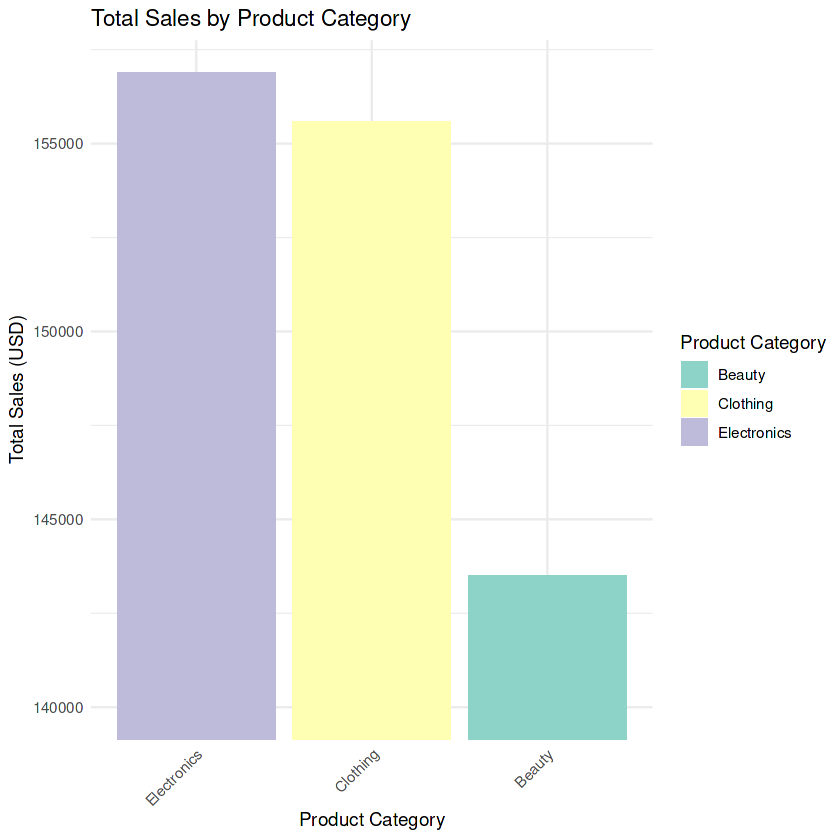

In [20]:
ggplot(sales_by_category, aes(x = reorder(product_category, -TotalSales), y = TotalSales, fill = product_category)) +
  geom_bar(stat = "identity") +
  labs(title = "Total Sales by Product Category",
       x = "Product Category",
       y = "Total Sales (USD)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_brewer(palette = "Set3", name = "Product Category") +
  coord_cartesian(ylim = c(140000, max(sales_by_category$TotalSales)))

#### Answer the Objective using Visualization

From the result above, we can conclude that the electronics category is the most popular, leading with the highest total sales. This dominance suggests that consumer demand for technology and gadgets is particularly strong, making electronics a key driver of revenue in the retail market. Following closely behind are the clothing and beauty categories, which also show significant sales figures, indicating robust interest in these areas as well. Retailers may want to focus their marketing efforts and inventory management on these top-performing categories to maximize sales potential and cater to consumer preferences effectively.

### Visualize of Objective 2. 

In this section, we present visualizations to explore how different age groups interact with various product categories. By segmenting the sales data and analyzing top-performing categories within each demographic, we gain valuable insights into consumer preferences across age groups.

#### Bar chart of sales by age group and category

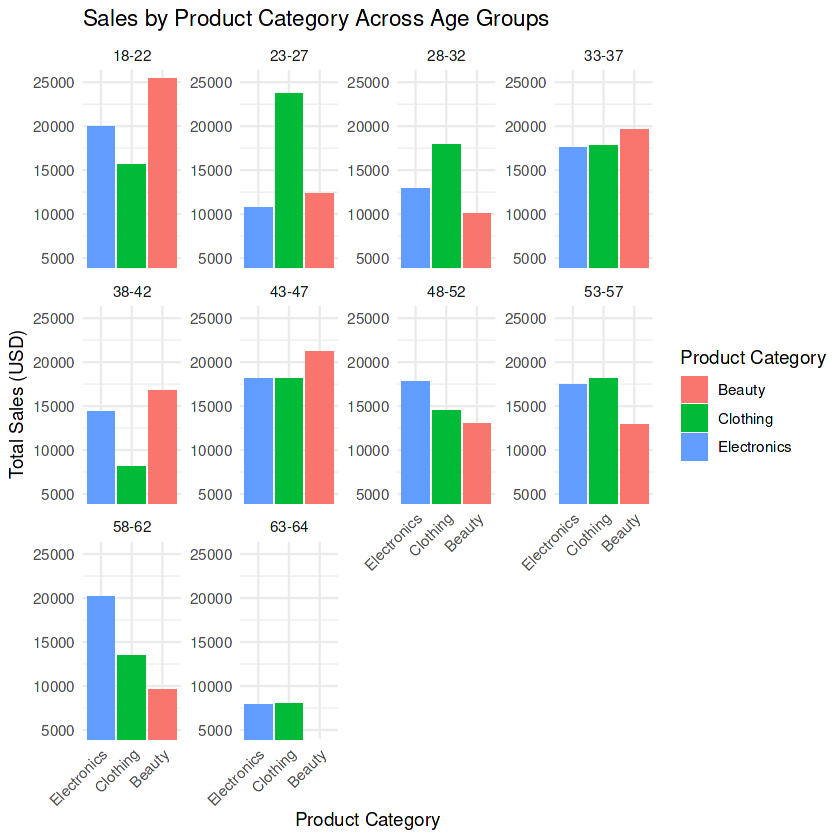

In [21]:
ggplot(sales_by_age_category, aes(x = reorder(product_category, -TotalSales), y = TotalSales, fill = product_category)) +
  geom_bar(stat = "identity") +
  facet_wrap(~ age_group, scales = "free_y") +
  labs(title = "Sales by Product Category Across Age Groups",
       x = "Product Category",
       y = "Total Sales (USD)",
       fill = "Product Category") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  coord_cartesian(ylim = c(5000, max(sales_by_age_category$TotalSales)))

From the chart, we observe that the age group of 63-64 has limited representation in certain product categories, such as Beauty, where sales fall below 5,000 USD. This suggests that while some categories perform well, others might not be as relevant or appealing to older demographics.

To provide a clearer view of top-performing categories for each age group, we also generate a specific bar chart focusing on the highest sales figures.


#### Bar Chart of top sales each age group and category

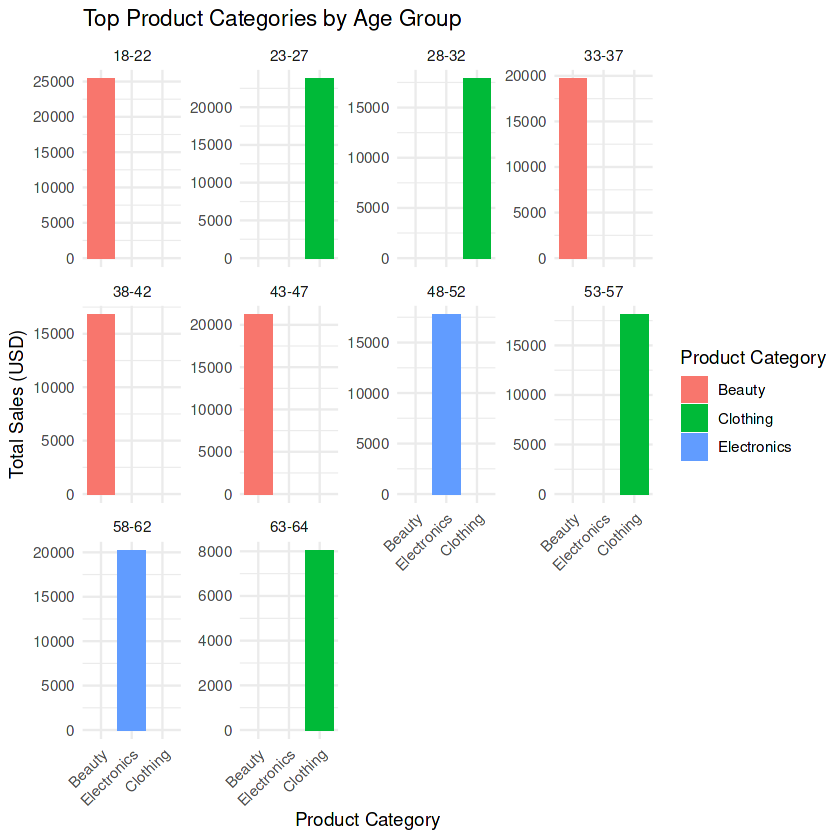

In [22]:
ggplot(top_sales_by_age_category, aes(x = reorder(product_category, -TotalSales), y = TotalSales, fill = product_category)) +
  geom_bar(stat = "identity") +
  facet_wrap(~ age_group, scales = "free_y") +
  labs(title = "Top Product Categories by Age Group",
       x = "Product Category",
       y = "Total Sales (USD)",
       fill = "Product Category") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) 


#### Visual the stacked bar chart by percentage contribution

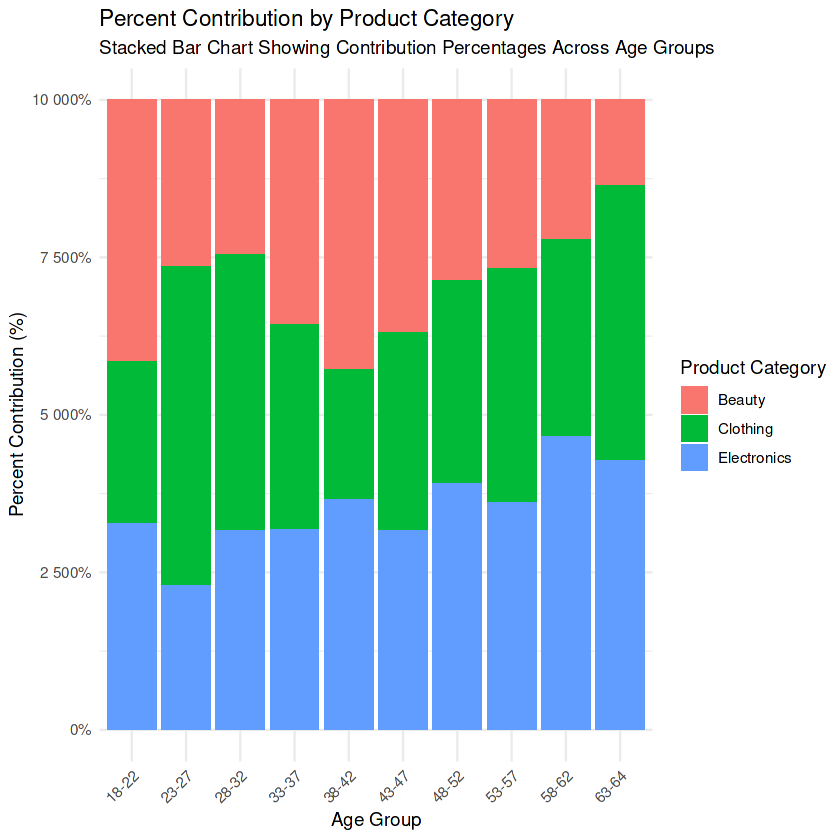

In [23]:
ggplot(sales_by_age_category, aes(x = age_group, y = PercentContribution, fill = product_category)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Percent Contribution by Product Category",
       subtitle = "Stacked Bar Chart Showing Contribution Percentages Across Age Groups",
       x = "Age Group",
       y = "Percent Contribution (%)",
       fill = "Product Category") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_y_continuous(labels = scales::percent_format())

print(sales_by_age_category)

The stacked bar chart illustrates the Percent Contribution of each product category to the total sales across different age groups. Each bar represents a specific age group and is divided into segments, where each segment corresponds to the contribution of a product category.
From the result above, we can conclude:

#### Answer the Objective using Visualization

From the result above, we can conclude : 

1. **Age Group 18-22**: Beauty leads in total sales, indicating a strong preference among younger consumers for beauty and personal care products.

2. **Age Group 23-27**: Clothing is the top category, reflecting a significant interest in fashion and apparel during these years.

3. **Age Group 28-32**: Clothing remains dominant, though the sales figures are slightly lower, suggesting consistent interest but with slightly reduced expenditure.

4. **Age Group 33-37**: Beauty products show strong performance with high average sales per item, highlighting ongoing consumer interest.

5. **Age Group 38-42**: Beauty continues to perform well, indicating sustained interest in personal care products.

6. **Age Group 43-47**: Beauty remains a leading category, demonstrating its ongoing relevance across various age groups.

7. **Age Group 48-52**: Electronics emerge as the top category, showing a shift towards technology and gadgets in middle age.

8. **Age Group 53-57**: Clothing leads again, reinforcing the trend seen in younger age groups.

9. **Age Group 58-62**: Electronics top the charts, reflecting strong interest in technology among older adults.

10. **Age Group 63-64**: Clothing is the leading category, though with lower sales compared to younger age groups, indicating that clothing remains a preferred choice even in the later years of life.
